In [1]:
# Change directory to the root folder of the repository
import os
os.chdir("../../")

In [2]:
# This is the directory where those files are downloaded to
data_dir = "/corgi/filippe/libsall/AGG1/outs"

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [4]:
import muon as mu

In [5]:
# Import a module with ATAC-seq-related functions
from muon import atac as ac

In [6]:
mdata = mu.read('/corgi/filippe/libr1/mltrnacelltype.h5mu')

In [7]:
mdata

MuData object with n_obs × n_vars = 10034 × 122758
  obs:	'leiden_joint', 'few_clusters', 'other_clusters'
  var:	'dispersions', 'dispersions_norm', 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'highly_variable_intersection', 'highly_variable_nbatches', 'interval', 'mean', 'mean_counts', 'means', 'n_cells', 'n_cells_by_counts', 'pct_dropout_by_counts', 'std', 'total_counts'
  obsm:	'X_mofa', 'X_umap'
  varm:	'LFs'
  obsp:	'connectivities', 'distances'
  2 modalities
    atac:	10034 x 115592
      obs:	'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden', 'rna_celltype', 'leiden_joint', 'other_clusters'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'atac', 'batchname_colors', 'dendrogram_leiden', 'dendrogram_rna_celltype', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'rna_celltype_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    rna:	10034 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'cellcycle_colors', 'dendrogram_celltype', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'

In [8]:
#useful functions: 

atac = mdata['atac']

def gofr(chreg):
    df1 = atac.uns['atac']['peak_annotation'][atac.uns['atac']['peak_annotation']['peak'].str.contains(chreg)]
    return df1

def findgene(inchrlist):
    for i in inchrlist: 
        print(gofr(i))

def findcreg(geneid): 
    df1 = atac.uns['atac']['peak_annotation'][atac.uns['atac']['peak_annotation'].index.str.contains(geneid)]
    return df1 

In [9]:
# bed file containing tf binding sites on chromatin data: 
import pyranges as pr
dfr = pr.read_bed('/corgi/filippe/libsall/AGG1/outs/analysis/tf_analysis/peak_motif_mapping.bed', as_df=True)

# useful functions for tfs: 
def findtf(chreg):
    df1 = dfr[dfr['Name'].str.contains(chreg)]
    return df1

def tfget(tf): 
    tfa = dfr[dfr['Start'] == tf]
    return tfa
# example: 
# findtf('Arid3a_MA0151.1')



In [10]:
# example: 
findtf('Arid3a_MA0151.1')

,Chromosome,Start,End,Name
0,chr1,7831173,7832081,Arid3a_MA0151.1
3,chr1,8533850,8534599,Arid3a_MA0151.1
10,chr1,13714852,13715600,Arid3a_MA0151.1
17,chr1,15884992,15885639,Arid3a_MA0151.1
24,chr1,15919149,15919982,Arid3a_MA0151.1
...,...,...,...,...
578671,chrX,135421470,135422313,Arid3a_MA0151.1
578688,chrX,136767235,136768063,Arid3a_MA0151.1
578692,chrX,137033495,137034428,Arid3a_MA0151.1
578788,chrX,154370914,154371812,Arid3a_MA0151.1


In [ ]:
# useful methods to have: 
#  mu.pp.intersect_obs(mudata)
#  mudata.update()

In [11]:
#
#
# read raw tf table from:
ttdata = ad.read('/corgi/filippe/atacadata/raw_tf_zero.h5ad', backed=False)
ttdata

AnnData object with n_obs × n_vars = 11770 × 746

In [184]:
zdata = mu.read('/corgi/filippe/rlib/the3rdmarchzdatawithbindingsites.h5mu')
zdata

/home/filippe/.local/lib/python3.8/site-packages/mudata/_core/mudata.py:376: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


MuData object with n_obs × n_vars = 10034 × 1492
  2 modalities
    rawtf:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zscoretf:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'batchname_colors', 'rna_celltype_colors'
      obsm:	'X_umap'

In [13]:
result = zdata['rawtf'].uns['rank_genes_groups']
groups = result['names'].dtype.names
rnkedgenes = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

In [14]:
tcellist= list(rnkedgenes['T cell_n'])[0:15]

In [15]:
rnkedgenes

,LZ1_n,LZ1_p,LZ2_n,LZ2_p,DZ2_n,DZ2_p,T cell_n,T cell_p,DZ1_n,DZ1_p,unknown_n,unknown_p,Plasma cell_n,Plasma cell_p,Dendritic cell_n,Dendritic cell_p
0,KLF15_MA1513.1,2.668223e-92,ZNF460_MA1596.1,6.693983e-80,Arid3a_MA0151.1,2.801173e-279,Ahr::Arnt_MA0006.1,5.951758e-297,POU3F4_MA0789.1,1.121933e-81,KLF15_MA1513.1,1.642571e-12,NFE2L1_MA0089.2,5.733032e-13,Sox5_MA0087.1,0.000006
1,Ahr::Arnt_MA0006.1,3.898080e-90,SPIB_MA0081.2,5.098818e-49,ZNF460_MA1596.1,2.137228e-277,THAP11_MA1573.1,2.875627e-246,POU5F1B_MA0792.1,1.121933e-81,NRF1_MA0506.1,6.176590e-10,BACH1_MA1633.1,1.307236e-09,ZNF460_MA1596.1,0.000190
2,SPI1_MA0080.5,6.893359e-84,SMAD3_MA0795.1,6.788835e-22,POU5F1B_MA0792.1,1.146086e-230,KLF15_MA1513.1,1.162273e-229,Arid3a_MA0151.1,1.369547e-72,Ahr::Arnt_MA0006.1,2.498978e-06,Nfe2l2_MA0150.2,4.432924e-08,NFIX(var.2)_MA1528.1,0.000345
3,IRF1_MA0050.2,3.235081e-82,JDP2_MA0655.1,2.395658e-19,POU3F4_MA0789.1,1.146086e-230,Arnt_MA0004.1,3.935669e-217,REST_MA0138.2,2.519206e-63,FOXG1_MA0613.1,1.444658e-05,SIX2_MA1119.1,1.413728e-07,Smad4_MA1153.1,0.000401
4,Arnt_MA0004.1,6.978419e-75,SPI1_MA0080.5,8.386666e-18,Sox5_MA0087.1,7.023271e-177,ZNF384_MA1125.1,4.124839e-90,ZNF140_MA1589.1,1.719432e-63,Dux_MA0611.1,4.331511e-05,Bach1::Mafk_MA0591.1,4.299908e-07,FOXL1_MA0033.2,0.001312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,JDP2_MA0655.1,5.399343e-55,ZSCAN29_MA1602.1,5.810920e-09,THAP11_MA1573.1,9.182629e-159,TBX5_MA0807.1,1.962064e-150,IRF1_MA0050.2,3.506728e-44,ASCL1(var.2)_MA1631.1,6.114439e-17,ETV4_MA0764.2,1.124684e-03,DMRTC2_MA1479.1,0.000597
742,REST_MA0138.2,3.831807e-60,KLF15_MA1513.1,3.845451e-11,IRF1_MA0050.2,1.659727e-222,TBX4_MA0806.1,1.962064e-150,Arnt_MA0004.1,3.181385e-69,EGR4_MA0733.1,3.311503e-17,KLF15_MA1513.1,6.398831e-04,EBF1_MA0154.4,0.000255
743,POU5F1B_MA0792.1,1.019183e-67,REST_MA0138.2,2.357138e-14,Arnt_MA0004.1,6.966896e-234,Arid3a_MA0151.1,2.654011e-185,Ahr::Arnt_MA0006.1,3.022786e-95,ZSCAN29_MA1602.1,2.087774e-17,NFIC(var.2)_MA1527.1,5.961162e-04,Arnt_MA0004.1,0.000173
744,POU3F4_MA0789.1,1.019183e-67,Ahr::Arnt_MA0006.1,5.518441e-16,Ahr::Arnt_MA0006.1,6.338221e-288,SPIB_MA0081.2,3.028425e-183,KLF15_MA1513.1,5.728598e-97,SPIB_MA0081.2,8.407540e-22,ATF7_MA0834.1,3.948375e-04,GLIS2_MA0736.1,0.000044


In [16]:
top1genes = list(zdata['rawtf'].uns['rank_genes_groups']['names'][0])
top2genes = list(zdata['rawtf'].uns['rank_genes_groups']['names'][1])
top3genes = list(zdata['rawtf'].uns['rank_genes_groups']['names'][2])
top4genes = list(zdata['rawtf'].uns['rank_genes_groups']['names'][3])

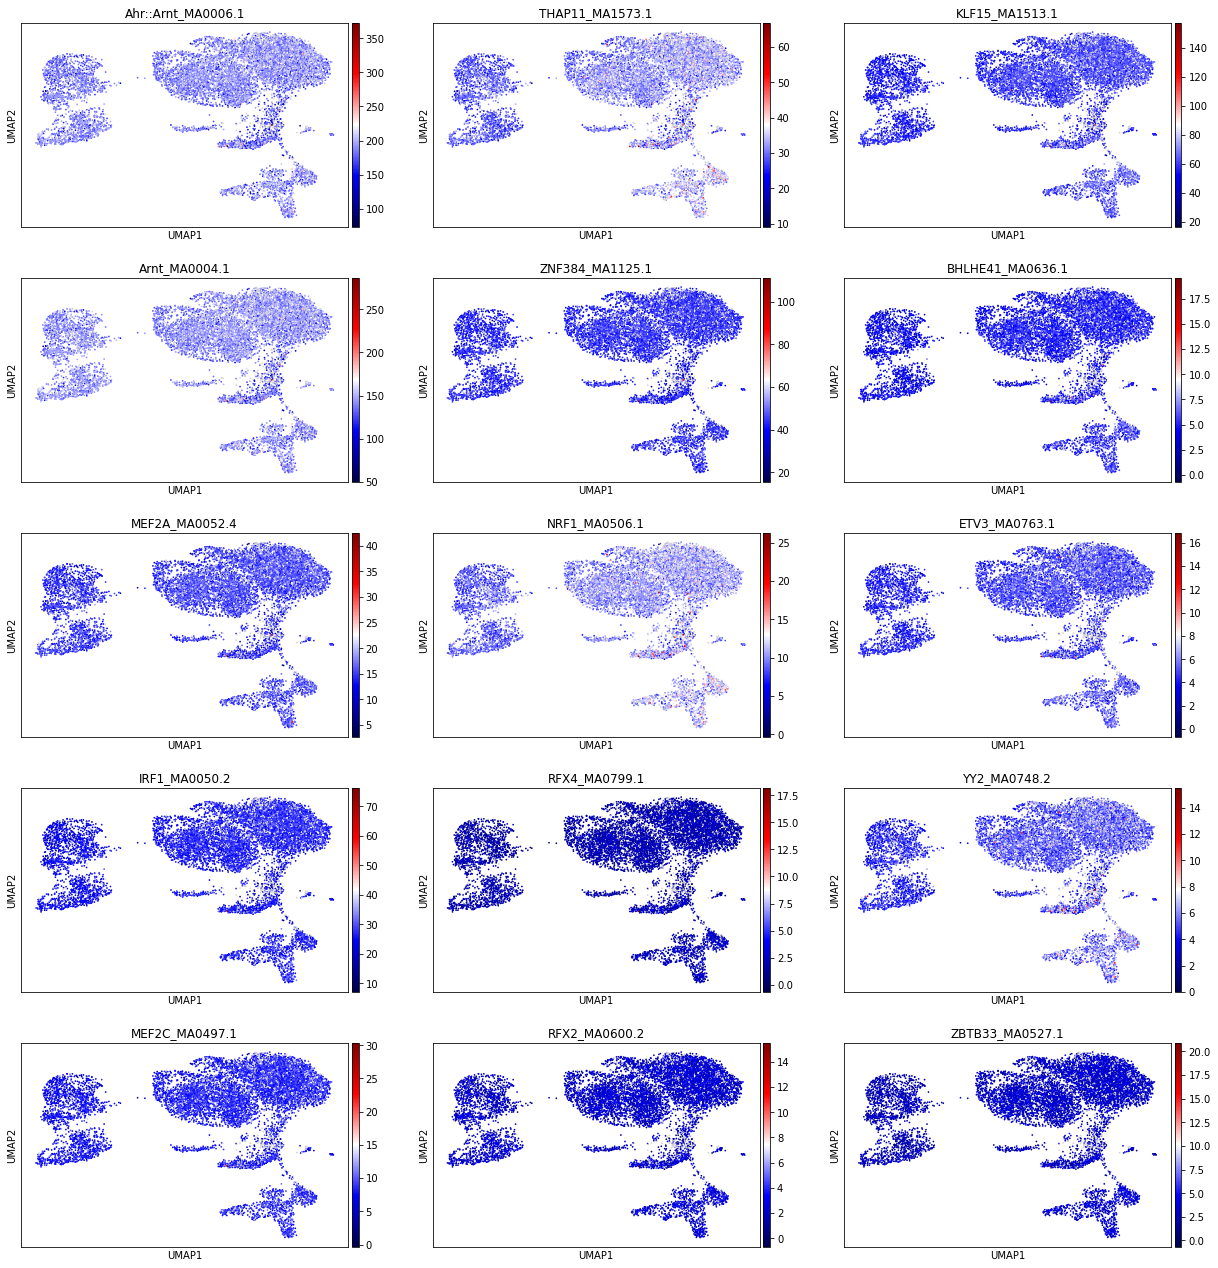

In [17]:
sc.pl.umap(zdata['zscoretf'], color=tcellist, legend_loc="on data", color_map = 'seismic', ncols = 3)

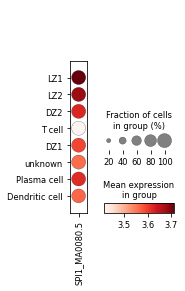

In [19]:
sc.pl.dotplot(zdata['rawtf'], ['SPI1_MA0080.5'], 'rna_celltype')

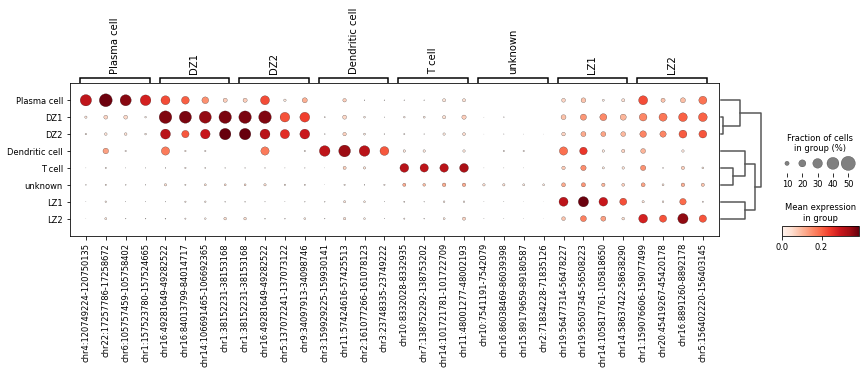

In [20]:
sc.pl.rank_genes_groups_dotplot(atac, groupby= "rna_celltype", n_genes=4)

In [22]:
result2nd = atac.uns['rank_genes_groups']
groups2nd = result2nd['names'].dtype.names
rnkedgenes2nd = pd.DataFrame(
    {group + '_' + key[:1]: result2nd[key][group]
    for group in groups2nd for key in ['names', 'pvals']})

In [24]:
rnkedgenes2nd.head(7)

,DZ1_n,DZ1_p,DZ2_n,DZ2_p,Dendritic cell_n,Dendritic cell_p,LZ1_n,LZ1_p,LZ2_n,LZ2_p,Plasma cell_n,Plasma cell_p,T cell_n,T cell_p,unknown_n,unknown_p
0,chr16:49281649-49282522,3.832596e-47,chr1:38152231-38153168,7.934340e-65,chr3:159929225-159930141,0.000306,chr19:56477314-56478227,3.229091e-100,chr1:159076606-159077499,2.351033e-56,chr4:120749224-120750135,1.300357e-09,chr10:8332028-8332935,1.443181e-49,chr10:7541191-7542079,1.807297e-07
1,chr16:84013799-84014717,7.121664e-46,chr16:49281649-49282522,1.239287e-55,chr11:57424616-57425513,0.000511,chr19:56507345-56508223,1.371819e-81,chr20:45419267-45420178,2.869009e-51,chr22:17257786-17258672,1.518016e-09,chr7:138752292-138753202,7.244496e-49,chr16:86038469-86039398,1.238610e-06
2,chr14:106691465-106692365,1.581373e-39,chr5:137072241-137073122,2.727210e-55,chr2:161077266-161078123,0.000704,chr14:105817761-105818650,6.951263e-66,chr16:8891260-8892178,5.278827e-45,chr6:105757459-105758402,4.988315e-09,chr14:101721781-101722709,5.299931e-42,chr15:89179659-89180587,1.320870e-06
3,chr1:38152231-38153168,4.817582e-37,chr9:34097913-34098746,1.014872e-54,chr3:23748335-23749222,0.000931,chr14:58637422-58638290,4.023345e-64,chr5:156402220-156403145,4.641565e-43,chr1:157523780-157524665,5.818208e-09,chr11:48001277-48002193,5.782697e-40,chr2:71834228-71835126,1.761431e-06
4,chr12:113161222-113162135,2.658407e-35,chr8:102534288-102535215,2.684725e-53,chr6:11731884-11732803,0.000987,chr4:155758542-155759435,7.148724e-63,chr2:227163952-227164767,3.866012e-39,chr11:73249183-73249983,6.963192e-08,chr6:137823776-137824701,2.248302e-39,chr11:35303761-35304718,1.897800e-06
5,chr6:148231-149111,4.460425e-33,chr16:10981604-10982482,1.403110e-50,chr10:93715118-93716022,0.001086,chr12:10721623-10722393,4.535080e-55,chr1:15949312-15950225,8.469258e-38,chr8:33554666-33555243,4.928400e-08,chr15:69468211-69469149,2.001710e-37,chr16:30551458-30552343,2.632885e-06
6,chr7:25862074-25863006,2.013209e-32,chr9:33871307-33872162,9.811677e-50,chr16:55444495-55445409,0.001208,chr4:179989754-179990658,2.474551e-53,chr2:16712792-16713702,1.513702e-37,chr1:117631930-117632782,8.867630e-08,chr22:25067920-25068816,4.614684e-36,chr2:100742376-100743238,3.043620e-06


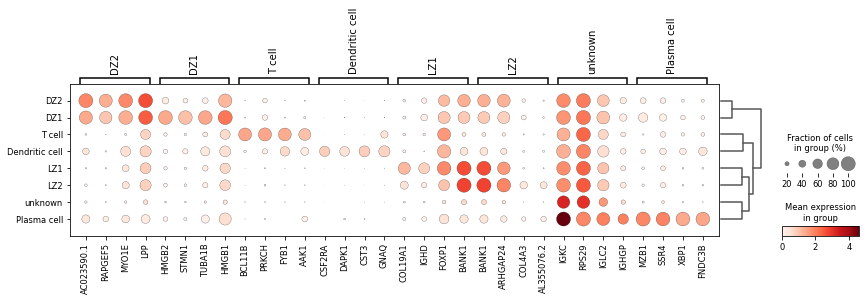

In [26]:
sc.pl.rank_genes_groups_dotplot(mdata['rna'], groupby= "celltype", n_genes=4)

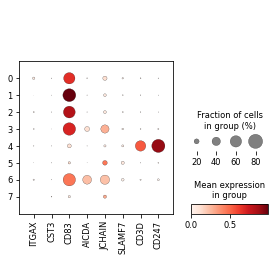

In [37]:
sc.pl.dotplot(mdata['rna'], ['ITGAX', 'CST3', 'CD83', 'AICDA', 
                             'JCHAIN', 'SLAMF7', 'CD3D', 'CD247'], 'leiden_joint_seven')

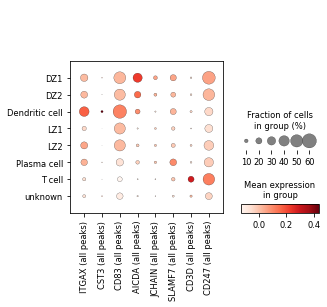

In [62]:
ac.pl.dotplot(atac, ['ITGAX', 'CST3', 'CD83', 'AICDA', 
                             'JCHAIN', 'SLAMF7', 'CD3D', 'CD247'], 'rna_celltype')

/home/filippe/.local/lib/python3.8/site-packages/muon/_atac/plot.py:101: UserWarning: Plotting individual peaks since bleh was not recognised. Try using 'total' or 'peak_type'.
  warnings.warn(


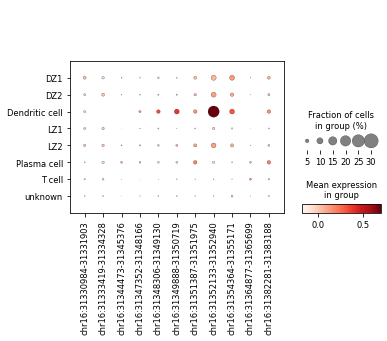

In [63]:
ac.pl.dotplot(atac, ['ITGAX'], 'rna_celltype', average = 'bleh')

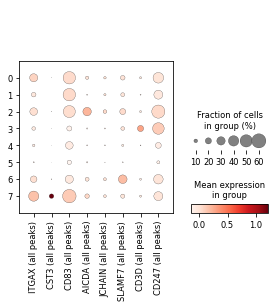

In [35]:
ac.pl.dotplot(atac, ['ITGAX', 'CST3', 'CD83', 'AICDA', 
                             'JCHAIN', 'SLAMF7', 'CD3D', 'CD247'], 'leiden')

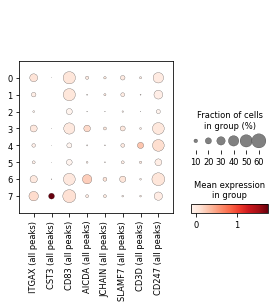

In [34]:
ac.pl.dotplot(atac, ['ITGAX', 'CST3', 'CD83', 'AICDA', 
                             'JCHAIN', 'SLAMF7', 'CD3D', 'CD247'], 'leiden_joint_seven')

In [38]:
mdata['rna'].obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batchname,S_score,G2M_score,phase,cellcycle,leiden,celltype,leiden_joint,other_clusters,leiden_joint_seven
AAACAGCCAAGATTCT-3,3601,3601,17367.0,399.0,2.297461,3,-0.049390,-0.002261,G1,G1,6,Plasma cell,16,24,5
AAACAGCCAATATACC-3,1529,1529,2957.0,192.0,6.493067,3,-0.024301,-0.044077,G1,G1,0,LZ1,3,1,1
AAACAGCCAGTACCGT-3,2004,2001,3741.0,192.0,5.132318,3,0.039835,-0.047578,S,S,3,T cell,7,7,4
AAACAGCCATTGTGGC-1,3931,3928,15317.0,597.0,3.897630,1,-0.060403,-0.014649,G1,G1,6,Plasma cell,16,24,5
AAACATGCAACGTGCT-4,1283,1283,2135.0,93.0,4.355972,4,0.017995,-0.001864,S,S,1,LZ2,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,1467,1467,2805.0,214.0,7.629233,1,-0.026132,-0.000889,G1,G1,0,LZ1,12,16,1
TTTGTGTTCGCTAGAT-4,1381,1381,2590.0,150.0,5.791506,4,-0.021209,-0.030474,G1,G1,0,LZ1,15,8,2
TTTGTTGGTAACCTAG-3,2035,2034,4144.0,139.0,3.354247,3,-0.058964,0.044091,G2M,G2M,3,T cell,7,7,4
TTTGTTGGTCGCAATA-3,1897,1895,3836.0,87.0,2.267987,3,-0.061067,-0.071183,G1,G1,0,LZ1,6,9,0


In [21]:
mdata

MuData object with n_obs × n_vars = 10034 × 122758
  obs:	'leiden_joint', 'few_clusters', 'other_clusters'
  var:	'dispersions', 'dispersions_norm', 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'highly_variable_intersection', 'highly_variable_nbatches', 'interval', 'mean', 'mean_counts', 'means', 'n_cells', 'n_cells_by_counts', 'pct_dropout_by_counts', 'std', 'total_counts'
  obsm:	'X_mofa', 'X_umap'
  varm:	'LFs'
  obsp:	'connectivities', 'distances'
  2 modalities
    atac:	10034 x 115592
      obs:	'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden', 'rna_celltype', 'leiden_joint', 'other_clusters'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'atac', 'batchname_colors', 'dendrogram_leiden', 'dendrogram_rna_celltype', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'rna_celltype_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    rna:	10034 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'cellcycle_colors', 'dendrogram_celltype', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'

... storing 'feature_types' as categorical
... storing 'interval' as categorical


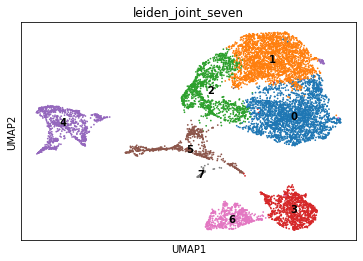

In [30]:
# joint clustering, which resolution is best?
# resolution=0.348 seems to be good, might generate. dendritic cells

sc.tl.leiden(mdata, key_added='leiden_joint_seven', resolution=0.348)
sc.pl.umap(mdata, color="leiden_joint_seven", legend_loc='on data')

In [33]:
mdata['rna'].obs['leiden_joint_seven'] = mdata.obs.leiden_joint_seven
mdata['atac'].obs['leiden_joint_seven'] = mdata.obs.leiden_joint_seven

In [39]:
mdata['rna'].obs['leiden_joint'] = mdata['rna'].obs['leiden_joint_seven']
mdata['atac'].obs['leiden_joint'] = mdata['rna'].obs['leiden_joint_seven']

In [43]:
mdata.obs['leiden_joint'] = mdata.obs['leiden_joint_seven']

In [48]:
atac = mdata['atac']

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns

In [56]:
mdata.obs['leiden_joint_seven']

AAACAGCCAAGATTCT-3    5
AAACAGCCAATATACC-3    1
AAACAGCCAGTACCGT-3    4
AAACAGCCATTGTGGC-1    5
AAACATGCAACGTGCT-4    0
                     ..
TTTGTGTTCGCTAAAC-1    1
TTTGTGTTCGCTAGAT-4    2
TTTGTTGGTAACCTAG-3    4
TTTGTTGGTCGCAATA-3    0
TTTGTTGGTTGGATAT-4    4
Name: leiden_joint_seven, Length: 10034, dtype: category
Categories (8, object): ['0', '1', '2', '3', '4', '5', '6', '7']

<AxesSubplot:xlabel='rna:celltype', ylabel='leiden_joint_seven'>

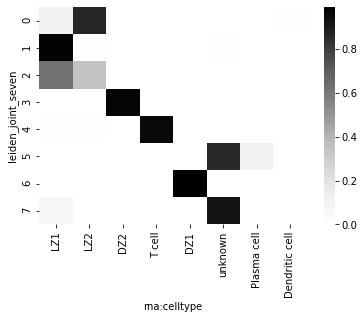

In [57]:
from sklearn.metrics import adjusted_rand_score as ari
ari(mdata.obs['rna:celltype'], mdata.obs['leiden_joint_seven'])

# Calculate total number of cells of respective ATAC celltypes
df_total = (
    mdata.obs.groupby("leiden_joint_seven").
        size().
        reset_index(name="n_total").
        set_index("leiden_joint_seven")
)

# Calculate number of cells for each pair of RNA-ATAC celltype annotation
df = (
    mdata.obs.groupby(["leiden_joint_seven", "rna:celltype"]).
        size().
        reset_index(name="n").
        set_index("leiden_joint_seven").
        join(df_total).
        reset_index()
)

# Calculate a fraction of cells of each RNA celltype (n)
# for each ATAC celltype (/ n_total)
df_frac = df.assign(frac = lambda x: x.n / x.n_total)

df_wide = df_frac.set_index("leiden_joint_seven").pivot(columns="rna:celltype", values="frac")

import seaborn as sns
sns.heatmap(df_wide, cmap="Greys")

In [54]:
mdata['atac'].obs

,n_genes_by_counts,total_counts,n_genes,NS,nucleosome_signal,tss_score,n_counts,batchname,leiden,rna_celltype,leiden_joint,other_clusters,leiden_joint_seven
AAACAGCCAAGATTCT-3,10485,25725.0,10485,1,0.907895,5.182375,25725.0,3,6,Plasma cell,5,24,5
AAACAGCCAATATACC-3,4751,10339.0,4751,1,0.652174,6.815697,10339.0,3,1,LZ1,1,1,1
AAACAGCCAGTACCGT-3,5675,13006.0,5675,1,0.765957,6.638419,13006.0,3,3,T cell,4,7,4
AAACAGCCATTGTGGC-1,8478,18211.0,8478,1,0.638889,5.677521,18211.0,1,6,Plasma cell,5,24,5
AAACATGCAACGTGCT-4,3977,8851.0,3977,1,0.535714,6.234419,8851.0,4,0,LZ2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,6381,14219.0,6381,1,0.702128,6.426648,14219.0,1,1,LZ1,1,16,1
TTTGTGTTCGCTAGAT-4,2733,5892.0,2733,1,0.560000,7.359130,5892.0,4,4,LZ1,2,8,2
TTTGTTGGTAACCTAG-3,3535,7682.0,3535,1,0.600000,10.484187,7682.0,3,3,T cell,4,7,4
TTTGTTGGTCGCAATA-3,6896,15055.0,6896,1,0.660000,3.435166,15055.0,3,0,LZ1,0,9,0


In [68]:
sc.pl.violin(y = zdata['rawtf'].var['bindingsite_counts'])

TypeError: violin() missing 2 required positional arguments: 'adata' and 'keys'

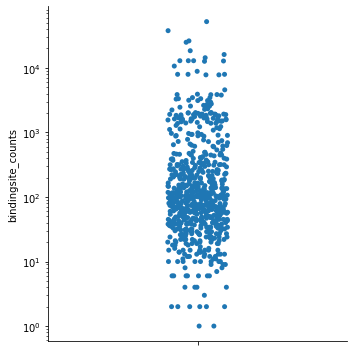

In [86]:
ggg = sns.catplot(y = zdata['rawtf'].var['bindingsite_counts'], data = zdata['rawtf'].var)
ggg.set(yscale="log")
# number of chromatin binding sites or peaks per tf

In [79]:
kv = list(zdata['rawtf'].var['bindingsite_counts'])
np.mean(kv)
np.sum(kv == 0)

0

In [83]:
np.sum(kv) / 746

768.298927613941

In [64]:
zdata['rawtf']

MuData object with n_obs × n_vars = 10034 × 1492
  2 modalities
    rawtf:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zscoretf:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'batchname_colors', 'rna_celltype_colors'
      obsm:	'X_umap'

In [87]:
findtf('ATF6')

,Chromosome,Start,End,Name
1956,chr1,198926829,198927720,ATF6_MA1466.1
9487,chr2,12695130,12696001,ATF6_MA1466.1
65627,chr2,168035186,168036075,ATF6_MA1466.1
108166,chr1,87030536,87031448,ATF6_MA1466.1
233420,chr3,19598569,19599478,ATF6_MA1466.1
281751,chr17,29718380,29719217,ATF6_MA1466.1
284789,chr2,126910488,126911275,ATF6_MA1466.1
341881,chr3,194910318,194911210,ATF6_MA1466.1
414683,chr3,45109973,45110858,ATF6_MA1466.1
452132,chr15,81296429,81297306,ATF6_MA1466.1


In [95]:
mdata['atac'].uns['atac']['peak_annotation']

,peak,distance,peak_type
gene_name,,,
MIR1302-2HG,chr1:9793-10694,-18860,distal
AL627309.5,chr1:180682-181137,-6821,distal
AL627309.5,chr1:181237-181792,-7376,distal
AP006222.2,chr1:267580-268484,726,distal
AC114498.1,chr1:585762-586654,-975,promoter
...,...,...,...
AC240274.1,KI270711.1:22576-23421,1229,distal
AC213203.2,KI270713.1:3917-4818,27710,distal
AC213203.2,KI270713.1:21430-22329,10199,distal


In [96]:
mdata

MuData object with n_obs × n_vars = 10034 × 122758
  obs:	'leiden_joint', 'few_clusters', 'other_clusters', 'leiden_joint_seven'
  var:	'dispersions', 'dispersions_norm', 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'highly_variable_intersection', 'highly_variable_nbatches', 'interval', 'mean', 'mean_counts', 'means', 'n_cells', 'n_cells_by_counts', 'pct_dropout_by_counts', 'std', 'total_counts'
  obsm:	'X_mofa', 'X_umap'
  varm:	'LFs'
  obsp:	'connectivities', 'distances'
  2 modalities
    atac:	10034 x 115592
      obs:	'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden', 'rna_celltype', 'leiden_joint', 'other_clusters', 'leiden_joint_seven'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'atac', 'batchname_colors', 'dendrogram_leiden', 'dendrogram_rna_celltype', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'rna_celltype_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    rna:	10034 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype', 'leiden_joint', 'other_clusters', 'leiden_joint_seven'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'cellcycle_colors', 'dendrogram_celltype', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'other_clusters_colors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'

In [175]:
# load chromvar output csv of johans old file: 

# Load pandas
#import pandas as pd

# Read CSV file into DataFrame df
#dft = pd.read_csv('/corgi/filippe/FromHome/RStorage/all746tfbcells10k.csv', index_col=0)
dft = pd.read_csv('/corgi/filippe/FromHome/RStorage/all746tfbcells10k.csv')
# Show dataframe
#print(dft)

In [180]:
# all746tfs.csv
sfs = pd.read_csv('/corgi/filippe/FromHome/RStorage/all746tfs.csv')

In [181]:
sfs

,Unnamed: 0,id,symbol
0,1,MA0004.1,Arnt
1,2,MA0006.1,Ahr::Arnt
2,3,MA0019.1,Ddit3::Cebpa
3,4,MA0029.1,Mecom
4,5,MA0030.1,FOXF2
...,...,...,...
741,742,MA0093.3,USF1
742,743,MA0526.3,USF2
743,744,MA0748.2,YY2
744,745,MA0528.2,ZNF263


In [176]:
#dft # works
#dtb
dft

,AAACAGCCAAGATTCT-3,AAACAGCCAATATACC-3,AAACAGCCAGTACCGT-3,AAACAGCCATTGTGGC-1,AAACATGCAACGTGCT-4,AAACATGCAATGAAGC-1,AAACATGCAATGAAGC-4,AAACATGCACAGCCAT-4,AAACATGCACCTGCCT-4,AAACATGCAGCAACAG-3,...,TTTGTGGCATGTCAGC-1,TTTGTGTTCATGGCCA-1,TTTGTGTTCATGGTTA-4,TTTGTGTTCCTCACTA-4,TTTGTGTTCGCTAAAC-1,TTTGTGTTCGCTAGAT-4,TTTGTTGGTAACCTAG-3,TTTGTTGGTCGCAATA-3,TTTGTTGGTGGGAACA-2,TTTGTTGGTTGGATAT-4
MA0004.1,1.839727,1.271281,-1.060049,0.138258,-0.034799,1.750616,0.852770,3.364953,-1.073293,0.606864,...,-1.303799,0.113754,1.421539,0.421155,-0.350634,-0.981712,1.428377,-1.455687,-0.902768,0.499933
MA0006.1,-0.049426,0.681847,-0.665134,-1.147398,0.976503,0.888063,-0.957740,1.987677,-0.645375,-1.574492,...,0.174441,0.118370,-0.142536,-1.134060,0.865854,0.460658,0.951237,1.166870,-1.386918,-0.298373
MA0019.1,0.844747,-0.059256,-1.500100,0.344882,0.460473,0.674287,-0.794618,-0.276548,0.497362,-1.474155,...,-0.073907,0.164758,1.311749,0.822241,0.226183,-0.694264,-0.351161,-1.023031,-1.810817,0.385204
MA0029.1,0.623760,-0.377563,0.240448,0.093980,0.271541,1.111676,-1.349960,1.180730,1.168110,-1.775362,...,0.293341,3.113133,0.018023,-0.290081,-0.740192,-1.354767,0.493082,0.512055,0.165966,0.085960
MA0030.1,0.289840,-0.759532,-0.109965,-0.914906,0.038646,-0.056561,-0.011757,0.937776,1.774934,0.386599,...,-0.656959,0.963522,0.102464,1.124028,-0.548908,-0.365683,0.078292,0.560762,2.627810,-0.057847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MA0093.3,-0.630180,0.081377,-0.832831,-0.610875,-2.398958,0.864195,0.288812,0.432589,0.891323,-1.012080,...,-0.136942,0.871837,-2.114342,0.014923,2.546505,0.266632,-1.119076,0.332404,-1.132222,-2.269557
MA0526.3,-0.591211,0.164375,0.243126,-0.966530,-2.628583,0.856518,1.145844,0.263275,2.299278,-0.004378,...,-0.012246,0.087345,-1.788647,0.043853,1.916861,0.098191,0.342998,0.251250,-0.853706,-2.248078
MA0748.2,0.375547,0.497178,-0.355731,-1.486532,-0.074301,1.700628,0.647133,0.318576,0.322121,-1.201818,...,0.511485,-0.812453,-1.286700,0.433973,0.727985,0.982622,0.850313,-0.324580,0.579223,1.490782
MA0528.2,-0.554930,0.264662,1.026430,-1.316479,1.561133,0.012511,-0.128412,-0.303075,0.294246,-0.362873,...,1.040800,1.153863,-0.305036,-1.075246,1.435201,-0.061216,-1.670478,1.393474,-0.135529,0.224302


In [177]:
# load chromvar output csv of bcell data:

dtb = dft
dtb


,AAACAGCCAAGATTCT-3,AAACAGCCAATATACC-3,AAACAGCCAGTACCGT-3,AAACAGCCATTGTGGC-1,AAACATGCAACGTGCT-4,AAACATGCAATGAAGC-1,AAACATGCAATGAAGC-4,AAACATGCACAGCCAT-4,AAACATGCACCTGCCT-4,AAACATGCAGCAACAG-3,...,TTTGTGGCATGTCAGC-1,TTTGTGTTCATGGCCA-1,TTTGTGTTCATGGTTA-4,TTTGTGTTCCTCACTA-4,TTTGTGTTCGCTAAAC-1,TTTGTGTTCGCTAGAT-4,TTTGTTGGTAACCTAG-3,TTTGTTGGTCGCAATA-3,TTTGTTGGTGGGAACA-2,TTTGTTGGTTGGATAT-4
MA0004.1,1.839727,1.271281,-1.060049,0.138258,-0.034799,1.750616,0.852770,3.364953,-1.073293,0.606864,...,-1.303799,0.113754,1.421539,0.421155,-0.350634,-0.981712,1.428377,-1.455687,-0.902768,0.499933
MA0006.1,-0.049426,0.681847,-0.665134,-1.147398,0.976503,0.888063,-0.957740,1.987677,-0.645375,-1.574492,...,0.174441,0.118370,-0.142536,-1.134060,0.865854,0.460658,0.951237,1.166870,-1.386918,-0.298373
MA0019.1,0.844747,-0.059256,-1.500100,0.344882,0.460473,0.674287,-0.794618,-0.276548,0.497362,-1.474155,...,-0.073907,0.164758,1.311749,0.822241,0.226183,-0.694264,-0.351161,-1.023031,-1.810817,0.385204
MA0029.1,0.623760,-0.377563,0.240448,0.093980,0.271541,1.111676,-1.349960,1.180730,1.168110,-1.775362,...,0.293341,3.113133,0.018023,-0.290081,-0.740192,-1.354767,0.493082,0.512055,0.165966,0.085960
MA0030.1,0.289840,-0.759532,-0.109965,-0.914906,0.038646,-0.056561,-0.011757,0.937776,1.774934,0.386599,...,-0.656959,0.963522,0.102464,1.124028,-0.548908,-0.365683,0.078292,0.560762,2.627810,-0.057847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MA0093.3,-0.630180,0.081377,-0.832831,-0.610875,-2.398958,0.864195,0.288812,0.432589,0.891323,-1.012080,...,-0.136942,0.871837,-2.114342,0.014923,2.546505,0.266632,-1.119076,0.332404,-1.132222,-2.269557
MA0526.3,-0.591211,0.164375,0.243126,-0.966530,-2.628583,0.856518,1.145844,0.263275,2.299278,-0.004378,...,-0.012246,0.087345,-1.788647,0.043853,1.916861,0.098191,0.342998,0.251250,-0.853706,-2.248078
MA0748.2,0.375547,0.497178,-0.355731,-1.486532,-0.074301,1.700628,0.647133,0.318576,0.322121,-1.201818,...,0.511485,-0.812453,-1.286700,0.433973,0.727985,0.982622,0.850313,-0.324580,0.579223,1.490782
MA0528.2,-0.554930,0.264662,1.026430,-1.316479,1.561133,0.012511,-0.128412,-0.303075,0.294246,-0.362873,...,1.040800,1.153863,-0.305036,-1.075246,1.435201,-0.061216,-1.670478,1.393474,-0.135529,0.224302


In [182]:
list(dtb.index)

['MA0004.1',
 'MA0006.1',
 'MA0019.1',
 'MA0029.1',
 'MA0030.1',
 'MA0031.1',
 'MA0040.1',
 'MA0041.1',
 'MA0051.1',
 'MA0057.1',
 'MA0059.1',
 'MA0066.1',
 'MA0067.1',
 'MA0069.1',
 'MA0070.1',
 'MA0071.1',
 'MA0072.1',
 'MA0073.1',
 'MA0074.1',
 'MA0077.1',
 'MA0078.1',
 'MA0084.1',
 'MA0087.1',
 'MA0091.1',
 'MA0092.1',
 'MA0101.1',
 'MA0107.1',
 'MA0108.2',
 'MA0109.1',
 'MA0111.1',
 'MA0115.1',
 'MA0116.1',
 'MA0119.1',
 'MA0125.1',
 'MA0130.1',
 'MA0135.1',
 'MA0139.1',
 'MA0142.1',
 'MA0149.1',
 'MA0138.2',
 'MA0002.2',
 'MA0065.2',
 'MA0151.1',
 'MA0152.1',
 'MA0155.1',
 'MA0159.1',
 'MA0160.1',
 'MA0163.1',
 'MA0164.1',
 'MA0259.1',
 'MA0146.2',
 'MA0467.1',
 'MA0468.1',
 'MA0476.1',
 'MA0478.1',
 'MA0479.1',
 'MA0480.1',
 'MA0483.1',
 'MA0488.1',
 'MA0489.1',
 'MA0492.1',
 'MA0493.1',
 'MA0494.1',
 'MA0497.1',
 'MA0501.1',
 'MA0503.1',
 'MA0504.1',
 'MA0505.1',
 'MA0506.1',
 'MA0507.1',
 'MA0513.1',
 'MA0514.1',
 'MA0515.1',
 'MA0517.1',
 'MA0518.1',
 'MA0519.1',
 'MA0520.1',

In [109]:
zdata['rawtf'].var[zdata['rawtf'].var['gene_ids'].str.contains('MA0030.1')]

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,bindingsite_counts
FOXF2_MA0030.1,FOXF2_MA0030.1,9551,19.089396,4.813634,191543.0,False,1.635687,0.326166,0.221542,1.5398,0.47203,62


In [185]:
zdata['rawtf'].var['gene_ids'][zdata['rawtf'].var['gene_ids'].str.contains('MA0526.3')][0]

'USF2_MA0526.3'

In [186]:
motifid = []
for k in list(dtb.index): 
    y = zdata['rawtf'].var['gene_ids'][zdata['rawtf'].var['gene_ids'].str.contains(k)][0]
    motifid.append(y)

In [187]:
motifid

['Arnt_MA0004.1',
 'Ahr::Arnt_MA0006.1',
 'Ddit3::Cebpa_MA0019.1',
 'Mecom_MA0029.1',
 'FOXF2_MA0030.1',
 'FOXD1_MA0031.1',
 'Foxq1_MA0040.1',
 'Foxd3_MA0041.1',
 'IRF2_MA0051.1',
 'MZF1(var.2)_MA0057.1',
 'MAX::MYC_MA0059.1',
 'PPARG_MA0066.1',
 'Pax2_MA0067.1',
 'PAX6_MA0069.1',
 'PBX1_MA0070.1',
 'RORA_MA0071.1',
 'RORA(var.2)_MA0072.1',
 'RREB1_MA0073.1',
 'RXRA::VDR_MA0074.1',
 'SOX9_MA0077.1',
 'Sox17_MA0078.1',
 'SRY_MA0084.1',
 'Sox5_MA0087.1',
 'TAL1::TCF3_MA0091.1',
 'Hand1::Tcf3_MA0092.1',
 'REL_MA0101.1',
 'RELA_MA0107.1',
 'TBP_MA0108.2',
 'HLTF_MA0109.1',
 'Spz1_MA0111.1',
 'NR1H2::RXRA_MA0115.1',
 'Znf423_MA0116.1',
 'NFIC::TLX1_MA0119.1',
 'Nobox_MA0125.1',
 'ZNF354C_MA0130.1',
 'Lhx3_MA0135.1',
 'CTCF_MA0139.1',
 'Pou5f1::Sox2_MA0142.1',
 'EWSR1-FLI1_MA0149.1',
 'REST_MA0138.2',
 'RUNX1_MA0002.2',
 'Pparg::Rxra_MA0065.2',
 'Arid3a_MA0151.1',
 'NFATC2_MA0152.1',
 'INSM1_MA0155.1',
 'RARA::RXRA_MA0159.1',
 'NR4A2_MA0160.1',
 'PLAG1_MA0163.1',
 'Nr2e3_MA0164.1',
 'ARNT::H

In [188]:
len(motifid)

746

In [189]:
dtb.index = motifid

In [190]:
dtb

,AAACAGCCAAGATTCT-3,AAACAGCCAATATACC-3,AAACAGCCAGTACCGT-3,AAACAGCCATTGTGGC-1,AAACATGCAACGTGCT-4,AAACATGCAATGAAGC-1,AAACATGCAATGAAGC-4,AAACATGCACAGCCAT-4,AAACATGCACCTGCCT-4,AAACATGCAGCAACAG-3,...,TTTGTGGCATGTCAGC-1,TTTGTGTTCATGGCCA-1,TTTGTGTTCATGGTTA-4,TTTGTGTTCCTCACTA-4,TTTGTGTTCGCTAAAC-1,TTTGTGTTCGCTAGAT-4,TTTGTTGGTAACCTAG-3,TTTGTTGGTCGCAATA-3,TTTGTTGGTGGGAACA-2,TTTGTTGGTTGGATAT-4
Arnt_MA0004.1,1.839727,1.271281,-1.060049,0.138258,-0.034799,1.750616,0.852770,3.364953,-1.073293,0.606864,...,-1.303799,0.113754,1.421539,0.421155,-0.350634,-0.981712,1.428377,-1.455687,-0.902768,0.499933
Ahr::Arnt_MA0006.1,-0.049426,0.681847,-0.665134,-1.147398,0.976503,0.888063,-0.957740,1.987677,-0.645375,-1.574492,...,0.174441,0.118370,-0.142536,-1.134060,0.865854,0.460658,0.951237,1.166870,-1.386918,-0.298373
Ddit3::Cebpa_MA0019.1,0.844747,-0.059256,-1.500100,0.344882,0.460473,0.674287,-0.794618,-0.276548,0.497362,-1.474155,...,-0.073907,0.164758,1.311749,0.822241,0.226183,-0.694264,-0.351161,-1.023031,-1.810817,0.385204
Mecom_MA0029.1,0.623760,-0.377563,0.240448,0.093980,0.271541,1.111676,-1.349960,1.180730,1.168110,-1.775362,...,0.293341,3.113133,0.018023,-0.290081,-0.740192,-1.354767,0.493082,0.512055,0.165966,0.085960
FOXF2_MA0030.1,0.289840,-0.759532,-0.109965,-0.914906,0.038646,-0.056561,-0.011757,0.937776,1.774934,0.386599,...,-0.656959,0.963522,0.102464,1.124028,-0.548908,-0.365683,0.078292,0.560762,2.627810,-0.057847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USF1_MA0093.3,-0.630180,0.081377,-0.832831,-0.610875,-2.398958,0.864195,0.288812,0.432589,0.891323,-1.012080,...,-0.136942,0.871837,-2.114342,0.014923,2.546505,0.266632,-1.119076,0.332404,-1.132222,-2.269557
USF2_MA0526.3,-0.591211,0.164375,0.243126,-0.966530,-2.628583,0.856518,1.145844,0.263275,2.299278,-0.004378,...,-0.012246,0.087345,-1.788647,0.043853,1.916861,0.098191,0.342998,0.251250,-0.853706,-2.248078
YY2_MA0748.2,0.375547,0.497178,-0.355731,-1.486532,-0.074301,1.700628,0.647133,0.318576,0.322121,-1.201818,...,0.511485,-0.812453,-1.286700,0.433973,0.727985,0.982622,0.850313,-0.324580,0.579223,1.490782
ZNF263_MA0528.2,-0.554930,0.264662,1.026430,-1.316479,1.561133,0.012511,-0.128412,-0.303075,0.294246,-0.362873,...,1.040800,1.153863,-0.305036,-1.075246,1.435201,-0.061216,-1.670478,1.393474,-0.135529,0.224302


In [191]:
dtbt = dtb.transpose()

In [192]:
dtbt

,Arnt_MA0004.1,Ahr::Arnt_MA0006.1,Ddit3::Cebpa_MA0019.1,Mecom_MA0029.1,FOXF2_MA0030.1,FOXD1_MA0031.1,Foxq1_MA0040.1,Foxd3_MA0041.1,IRF2_MA0051.1,MZF1(var.2)_MA0057.1,...,TEAD1_MA0090.3,TEAD4_MA0809.2,TFAP2A_MA0003.4,TFAP2C(var.2)_MA0814.2,TWIST1_MA1123.2,USF1_MA0093.3,USF2_MA0526.3,YY2_MA0748.2,ZNF263_MA0528.2,CREM_MA0609.2
AAACAGCCAAGATTCT-3,1.839727,-0.049426,0.844747,0.623760,0.289840,-0.708935,0.350592,0.162483,4.148801,-0.438510,...,0.147121,-0.668773,1.097211,-0.121122,0.995895,-0.630180,-0.591211,0.375547,-0.554930,0.268788
AAACAGCCAATATACC-3,1.271281,0.681847,-0.059256,-0.377563,-0.759532,-0.752887,-2.170156,1.221169,-0.075256,-1.327228,...,0.323312,-0.262888,1.167484,1.546561,-0.811438,0.081377,0.164375,0.497178,0.264662,-1.131204
AAACAGCCAGTACCGT-3,-1.060049,-0.665134,-1.500100,0.240448,-0.109965,-0.346169,-0.417541,-0.893502,-0.732084,1.329038,...,-0.072836,-1.121164,-1.163084,-0.693885,0.570876,-0.832831,0.243126,-0.355731,1.026430,1.336428
AAACAGCCATTGTGGC-1,0.138258,-1.147398,0.344882,0.093980,-0.914906,-0.693802,0.838554,-1.049149,2.859989,-1.963731,...,-1.704759,-2.826330,-0.801648,-0.568401,3.194555,-0.610875,-0.966530,-1.486532,-1.316479,-2.057571
AAACATGCAACGTGCT-4,-0.034799,0.976503,0.460473,0.271541,0.038646,-0.980819,-0.326594,1.077932,-0.174728,0.772797,...,0.472390,0.285944,0.503311,0.748665,0.330925,-2.398958,-2.628583,-0.074301,1.561133,-0.452781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAGAT-4,-0.981712,0.460658,-0.694264,-1.354767,-0.365683,0.265481,-1.088719,1.212377,-1.545625,-0.691931,...,-0.187207,-0.756879,0.571314,0.437827,0.352540,0.266632,0.098191,0.982622,-0.061216,-0.036730
TTTGTTGGTAACCTAG-3,1.428377,0.951237,-0.351161,0.493082,0.078292,0.134417,0.937174,0.590843,0.521096,-0.014136,...,-0.436629,-0.362481,-1.198709,-1.214168,-1.862937,-1.119076,0.342998,0.850313,-1.670478,-0.426655
TTTGTTGGTCGCAATA-3,-1.455687,1.166870,-1.023031,0.512055,0.560762,0.236967,1.499235,-0.510607,1.985430,0.187327,...,0.722517,0.244354,1.346967,1.126490,0.133458,0.332404,0.251250,-0.324580,1.393474,-0.820554
TTTGTTGGTGGGAACA-2,-0.902768,-1.386918,-1.810817,0.165966,2.627810,2.000204,1.855579,0.923582,-0.525412,-0.054141,...,-1.383932,-0.837384,-0.988730,-1.273119,-0.259165,-1.132222,-0.853706,0.579223,-0.135529,-1.167203


In [193]:
cvar = ad.AnnData(dtbt)


In [194]:
cvar.var['gene_ids'] = motifid

In [195]:
cvar.var

,gene_ids
Arnt_MA0004.1,Arnt_MA0004.1
Ahr::Arnt_MA0006.1,Ahr::Arnt_MA0006.1
Ddit3::Cebpa_MA0019.1,Ddit3::Cebpa_MA0019.1
Mecom_MA0029.1,Mecom_MA0029.1
FOXF2_MA0030.1,FOXF2_MA0030.1
...,...
USF1_MA0093.3,USF1_MA0093.3
USF2_MA0526.3,USF2_MA0526.3
YY2_MA0748.2,YY2_MA0748.2
ZNF263_MA0528.2,ZNF263_MA0528.2


In [197]:
# save: 
cvar.write('/corgi/filippe/FromHome/atacrnatfanalysis/cvarnew_raw.h5ad')

In [ ]:
# ids should be the same as in previous: 
# https://jaspar.genereg.net/matrix/MA0080.5/ 

In [198]:
chromvar = mu.MuData({'tfraw': zdata['rawtf'], 'zcvar': cvar})

/home/filippe/.local/lib/python3.8/site-packages/mudata/_core/mudata.py:376: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [199]:
chromvar

MuData object with n_obs × n_vars = 11770 × 1492
  2 modalities
    tfraw:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zcvar:	11770 x 746
      var:	'gene_ids'

In [200]:
mu.pp.intersect_obs(chromvar)
chromvar.update()

In [201]:
chromvar

MuData object with n_obs × n_vars = 10034 × 1492
  2 modalities
    tfraw:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zcvar:	10034 x 746
      var:	'gene_ids'

In [202]:
chromvar['zcvar'].obs['batchname'] = chromvar['tfraw'].obs['batchname']

In [203]:
chromvar['zcvar'].obsm['X_pca'] = chromvar['tfraw'].obsm['X_pca']
chromvar['zcvar'].obsm['X_umap'] = chromvar['tfraw'].obsm['X_umap']

In [204]:
chromvar

MuData object with n_obs × n_vars = 10034 × 1492
  2 modalities
    tfraw:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zcvar:	10034 x 746
      obs:	'batchname'
      var:	'gene_ids'
      obsm:	'X_pca', 'X_umap'

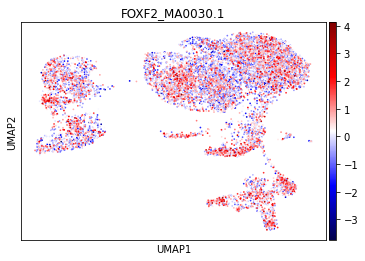

In [205]:
sc.pl.umap(chromvar['zcvar'], color=['FOXF2_MA0030.1'], legend_loc="on data", color_map = 'seismic', ncols = 3)

In [210]:
# save preparations: 
chromvar.write('/corgi/filippe/FromHome/atacrnatfanalysis/bcellcvar.h5mu')
# rnkedgenes.isin(motifid)

In [211]:
chromvar.write('/corgi/filippe/FromHome/atacrnatfanalysis/bcell2cvar.h5mu')

In [208]:
#top1genes[pd.top1genes.isin(motifid)] #motifid

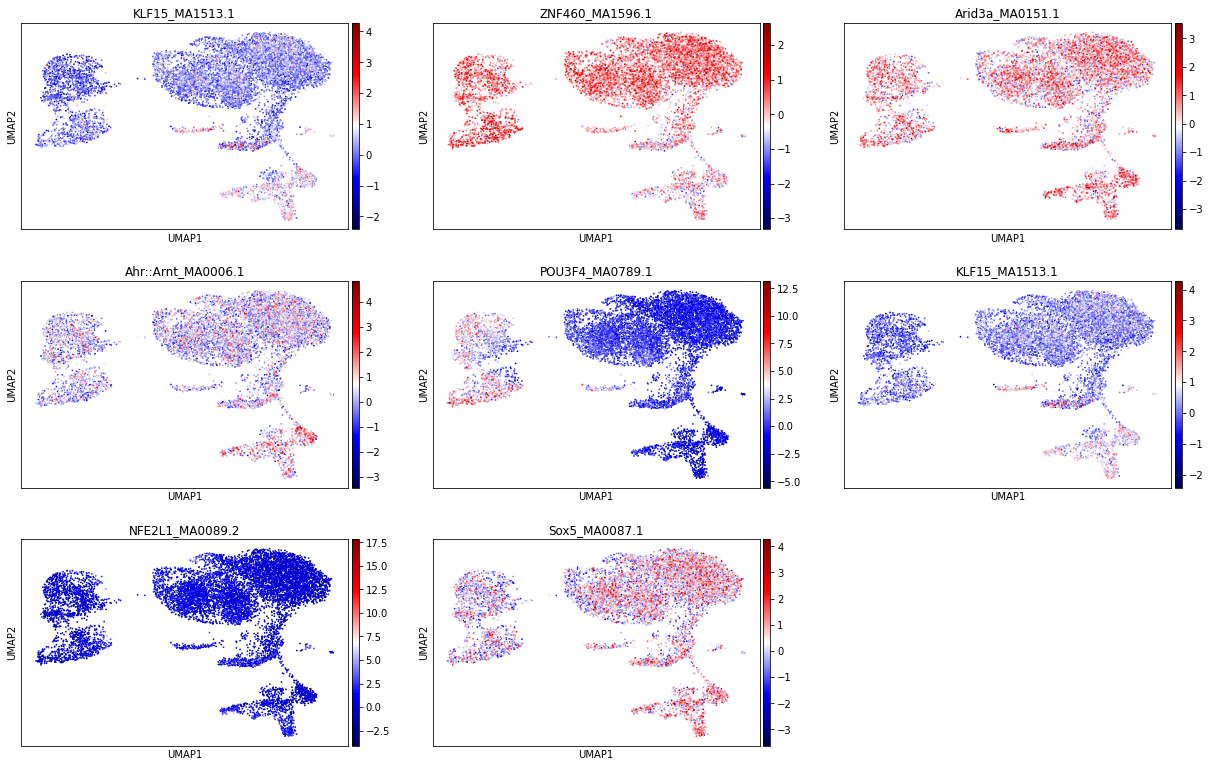

In [209]:
sc.pl.umap(chromvar['zcvar'], color=top1genes, legend_loc="on data", color_map = 'seismic', ncols = 3)

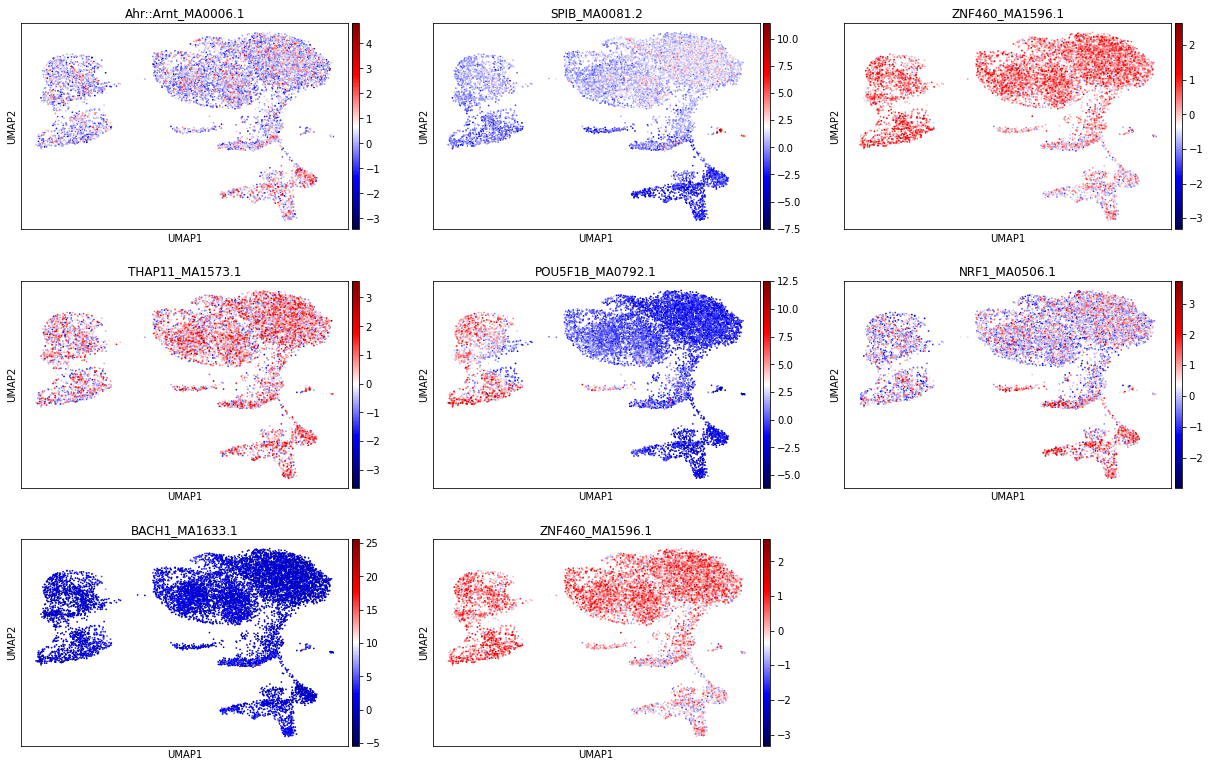

In [212]:
sc.pl.umap(chromvar['zcvar'], color=top2genes, legend_loc="on data", color_map = 'seismic', ncols = 3)

In [150]:
zdata['rawtf'].var[zdata['rawtf'].var.isin(motifid)['gene_ids']]

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,bindingsite_counts
ALX3_MA0634.1,ALX3_MA0634.1,9510,18.295994,5.222244,183582.0,True,1.588898,0.454062,1.483598,1.489914,0.475764,160
ARGFX_MA1463.1,ARGFX_MA1463.1,9566,20.514650,4.664142,205844.0,False,1.679327,0.295156,-0.123391,1.584281,0.473599,270
ARNT::HIF1A_MA0259.1,ARNT::HIF1A_MA0259.1,9906,68.823700,1.275663,690577.0,False,2.762072,0.399569,0.085307,2.708602,0.392707,537
ARNT2_MA1464.1,ARNT2_MA1464.1,9727,34.260815,3.059597,343773.0,True,2.134531,0.523219,1.838918,2.049272,0.469265,124
ASCL1_MA1100.2,ASCL1_MA1100.2,9769,35.032490,2.641021,351516.0,True,2.126393,0.411824,0.752937,2.047609,0.448582,445
...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF684_MA1600.1,ZNF684_MA1600.1,8716,6.497210,13.135340,65193.0,False,0.887138,0.265009,-0.170381,0.783405,0.445642,34
ZNF740_MA0753.2,ZNF740_MA0753.2,8942,9.013255,10.882998,90439.0,False,1.056323,0.198152,-0.629291,0.948122,0.469691,199
ZNF75D_MA1601.1,ZNF75D_MA1601.1,9586,22.655272,4.464820,227323.0,False,1.749695,0.271548,-0.385986,1.656857,0.474668,346
ZSCAN29_MA1602.1,ZSCAN29_MA1602.1,624,0.126071,93.781144,1265.0,False,0.024514,0.270612,0.401276,0.018974,0.089670,3


In [155]:
zdata['rawtf'].var.isin(motifid)['gene_ids'] 

Ahr::Arnt_MA0006.1    False
Alx1_MA0854.1         False
ALX3_MA0634.1          True
Alx4_MA0853.1         False
Ar_MA0007.3           False
                      ...  
ZNF684_MA1600.1        True
ZNF740_MA0753.2        True
ZNF75D_MA1601.1        True
ZSCAN29_MA1602.1       True
ZSCAN4_MA1155.1        True
Name: gene_ids, Length: 746, dtype: bool

In [154]:
zdata['rawtf'].var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,bindingsite_counts
Ahr::Arnt_MA0006.1,Ahr::Arnt_MA0006.1,10034,2775.332031,0.000000,27847682.0,True,6.393959,1.494605,1.025246,6.390213,0.086926,16134
Alx1_MA0854.1,Alx1_MA0854.1,9640,24.943892,3.926649,250287.0,False,1.854532,0.174182,-1.469019,1.765604,0.471118,75
ALX3_MA0634.1,ALX3_MA0634.1,9510,18.295994,5.222244,183582.0,True,1.588898,0.454062,1.483598,1.489914,0.475764,160
Alx4_MA0853.1,Alx4_MA0853.1,9601,21.884293,4.315328,219587.0,False,1.748093,0.319638,0.148928,1.654003,0.474562,68
Ar_MA0007.3,Ar_MA0007.3,6257,2.328184,37.642017,23361.0,False,0.401064,0.027691,-1.037902,0.333616,0.341064,27
...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF684_MA1600.1,ZNF684_MA1600.1,8716,6.497210,13.135340,65193.0,False,0.887138,0.265009,-0.170381,0.783405,0.445642,34
ZNF740_MA0753.2,ZNF740_MA0753.2,8942,9.013255,10.882998,90439.0,False,1.056323,0.198152,-0.629291,0.948122,0.469691,199
ZNF75D_MA1601.1,ZNF75D_MA1601.1,9586,22.655272,4.464820,227323.0,False,1.749695,0.271548,-0.385986,1.656857,0.474668,346
ZSCAN29_MA1602.1,ZSCAN29_MA1602.1,624,0.126071,93.781144,1265.0,False,0.024514,0.270612,0.401276,0.018974,0.089670,3


In [159]:
# zdata['rawtf'].var['newtf'] = zdata['rawtf'].var.isin(motifid)['gene_ids'] * 1

In [160]:
zdata['rawtf'].var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,bindingsite_counts,newtf
Ahr::Arnt_MA0006.1,Ahr::Arnt_MA0006.1,10034,2775.332031,0.000000,27847682.0,True,6.393959,1.494605,1.025246,6.390213,0.086926,16134,0
Alx1_MA0854.1,Alx1_MA0854.1,9640,24.943892,3.926649,250287.0,False,1.854532,0.174182,-1.469019,1.765604,0.471118,75,0
ALX3_MA0634.1,ALX3_MA0634.1,9510,18.295994,5.222244,183582.0,True,1.588898,0.454062,1.483598,1.489914,0.475764,160,1
Alx4_MA0853.1,Alx4_MA0853.1,9601,21.884293,4.315328,219587.0,False,1.748093,0.319638,0.148928,1.654003,0.474562,68,0
Ar_MA0007.3,Ar_MA0007.3,6257,2.328184,37.642017,23361.0,False,0.401064,0.027691,-1.037902,0.333616,0.341064,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF684_MA1600.1,ZNF684_MA1600.1,8716,6.497210,13.135340,65193.0,False,0.887138,0.265009,-0.170381,0.783405,0.445642,34,1
ZNF740_MA0753.2,ZNF740_MA0753.2,8942,9.013255,10.882998,90439.0,False,1.056323,0.198152,-0.629291,0.948122,0.469691,199,1
ZNF75D_MA1601.1,ZNF75D_MA1601.1,9586,22.655272,4.464820,227323.0,False,1.749695,0.271548,-0.385986,1.656857,0.474668,346,1
ZSCAN29_MA1602.1,ZSCAN29_MA1602.1,624,0.126071,93.781144,1265.0,False,0.024514,0.270612,0.401276,0.018974,0.089670,3,1


In [ ]:
x.isin(motifid)['gene_ids']

In [161]:
# gene filtering successful
#mu.pp.filter_var(zdata['rawtf'], 'newtf', lambda x: x > 0)

In [162]:
zdata['rawtf'].var

,gene_ids,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std,bindingsite_counts,newtf
ALX3_MA0634.1,ALX3_MA0634.1,9510,18.295994,5.222244,183582.0,True,1.588898,0.454062,1.483598,1.489914,0.475764,160,1
ARGFX_MA1463.1,ARGFX_MA1463.1,9566,20.514650,4.664142,205844.0,False,1.679327,0.295156,-0.123391,1.584281,0.473599,270,1
ARNT::HIF1A_MA0259.1,ARNT::HIF1A_MA0259.1,9906,68.823700,1.275663,690577.0,False,2.762072,0.399569,0.085307,2.708602,0.392707,537,1
ARNT2_MA1464.1,ARNT2_MA1464.1,9727,34.260815,3.059597,343773.0,True,2.134531,0.523219,1.838918,2.049272,0.469265,124,1
ASCL1_MA1100.2,ASCL1_MA1100.2,9769,35.032490,2.641021,351516.0,True,2.126393,0.411824,0.752937,2.047609,0.448582,445,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF684_MA1600.1,ZNF684_MA1600.1,8716,6.497210,13.135340,65193.0,False,0.887138,0.265009,-0.170381,0.783405,0.445642,34,1
ZNF740_MA0753.2,ZNF740_MA0753.2,8942,9.013255,10.882998,90439.0,False,1.056323,0.198152,-0.629291,0.948122,0.469691,199,1
ZNF75D_MA1601.1,ZNF75D_MA1601.1,9586,22.655272,4.464820,227323.0,False,1.749695,0.271548,-0.385986,1.656857,0.474668,346,1
ZSCAN29_MA1602.1,ZSCAN29_MA1602.1,624,0.126071,93.781144,1265.0,False,0.024514,0.270612,0.401276,0.018974,0.089670,3,1


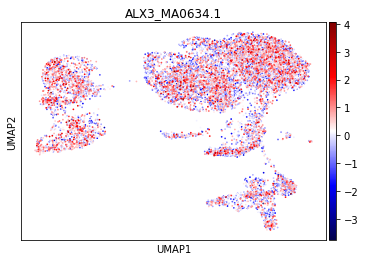

In [170]:
sc.pl.umap(chromvar['zcvar'], color=['ALX3_MA0634.1'], legend_loc="on data", color_map = 'seismic', ncols = 3)

In [166]:
# need to rerank genes for tfs: 
#sc.tl.rank_genes_groups(zdata['rawtf'], 'rna_celltype', method='t-test')

In [165]:
zdata['rawtf']

AnnData object with n_obs × n_vars = 10034 × 633
    obs: 'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts', 'newtf'
    uns: 'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
    obsm: 'X_pca', 'X_umap'

In [167]:
result = zdata['rawtf'].uns['rank_genes_groups']
groups = result['names'].dtype.names
rnkedgenes = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

In [168]:
rnkedgenes

,LZ1_n,LZ1_p,LZ2_n,LZ2_p,DZ2_n,DZ2_p,T cell_n,T cell_p,DZ1_n,DZ1_p,unknown_n,unknown_p,Plasma cell_n,Plasma cell_p,Dendritic cell_n,Dendritic cell_p
0,KLF15_MA1513.1,2.668223e-92,ZNF460_MA1596.1,6.693983e-80,Arid3a_MA0151.1,2.801173e-279,Ahr::Arnt_MA0006.1,5.951758e-297,POU3F4_MA0789.1,1.121933e-81,KLF15_MA1513.1,1.642571e-12,NFE2L1_MA0089.2,5.733032e-13,Sox5_MA0087.1,0.000006
1,Ahr::Arnt_MA0006.1,3.898080e-90,SPIB_MA0081.2,5.098818e-49,ZNF460_MA1596.1,2.137228e-277,THAP11_MA1573.1,2.875627e-246,POU5F1B_MA0792.1,1.121933e-81,NRF1_MA0506.1,6.176590e-10,BACH1_MA1633.1,1.307236e-09,ZNF460_MA1596.1,0.000190
2,SPI1_MA0080.5,6.893359e-84,SMAD3_MA0795.1,6.788835e-22,POU5F1B_MA0792.1,1.146086e-230,KLF15_MA1513.1,1.162273e-229,Arid3a_MA0151.1,1.369547e-72,Ahr::Arnt_MA0006.1,2.498978e-06,Nfe2l2_MA0150.2,4.432924e-08,NFIX(var.2)_MA1528.1,0.000345
3,IRF1_MA0050.2,3.235081e-82,JDP2_MA0655.1,2.395658e-19,POU3F4_MA0789.1,1.146086e-230,Arnt_MA0004.1,3.935669e-217,REST_MA0138.2,2.519206e-63,FOXG1_MA0613.1,1.444658e-05,SIX2_MA1119.1,1.413728e-07,Smad4_MA1153.1,0.000401
4,Arnt_MA0004.1,6.978419e-75,SPI1_MA0080.5,8.386666e-18,Sox5_MA0087.1,7.023271e-177,ZNF384_MA1125.1,4.124839e-90,ZNF140_MA1589.1,1.719432e-63,Dux_MA0611.1,4.331511e-05,Bach1::Mafk_MA0591.1,4.299908e-07,FOXL1_MA0033.2,0.001312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,JDP2_MA0655.1,5.399343e-55,ZSCAN29_MA1602.1,5.810920e-09,THAP11_MA1573.1,9.182629e-159,TBX5_MA0807.1,1.962064e-150,IRF1_MA0050.2,3.506728e-44,ASCL1(var.2)_MA1631.1,6.114439e-17,ETV4_MA0764.2,1.124684e-03,DMRTC2_MA1479.1,0.000597
742,REST_MA0138.2,3.831807e-60,KLF15_MA1513.1,3.845451e-11,IRF1_MA0050.2,1.659727e-222,TBX4_MA0806.1,1.962064e-150,Arnt_MA0004.1,3.181385e-69,EGR4_MA0733.1,3.311503e-17,KLF15_MA1513.1,6.398831e-04,EBF1_MA0154.4,0.000255
743,POU5F1B_MA0792.1,1.019183e-67,REST_MA0138.2,2.357138e-14,Arnt_MA0004.1,6.966896e-234,Arid3a_MA0151.1,2.654011e-185,Ahr::Arnt_MA0006.1,3.022786e-95,ZSCAN29_MA1602.1,2.087774e-17,NFIC(var.2)_MA1527.1,5.961162e-04,Arnt_MA0004.1,0.000173
744,POU3F4_MA0789.1,1.019183e-67,Ahr::Arnt_MA0006.1,5.518441e-16,Ahr::Arnt_MA0006.1,6.338221e-288,SPIB_MA0081.2,3.028425e-183,KLF15_MA1513.1,5.728598e-97,SPIB_MA0081.2,8.407540e-22,ATF7_MA0834.1,3.948375e-04,GLIS2_MA0736.1,0.000044


In [169]:
zdata['rawtf']

MuData object with n_obs × n_vars = 10034 × 1492
  2 modalities
    rawtf:	10034 x 633
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'bindingsite_counts', 'newtf'
      uns:	'dendrogram_rna_celltype', 'hvg', 'rank_genes_groups', 'rna_celltype_colors'
      obsm:	'X_pca', 'X_umap'
    zscoretf:	10034 x 746
      obs:	'batchname', 'n_genes_by_counts', 'total_counts', 'rna_celltype'
      var:	'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'batchname_colors', 'rna_celltype_colors'
      obsm:	'X_umap'

In [173]:
zdata['rawtf'].write('/corgi/filippe/FromHome/atacrnatfanalysis/motifaddedforchromvar.h5ad')

In [171]:
ttdata

AnnData object with n_obs × n_vars = 11770 × 746

In [ ]:
zdata['rawtf'].var['newtf'] = zdata['rawtf'].var.isin(motifid)['gene_ids'] * 1

In [172]:
ttdata.X

array([[6.310e+03, 4.800e+01, 4.100e+01, ..., 5.800e+01, 0.000e+00,
        1.100e+01],
       [2.672e+03, 2.200e+01, 1.600e+01, ..., 2.300e+01, 0.000e+00,
        3.000e+00],
       [3.362e+03, 3.400e+01, 2.900e+01, ..., 3.500e+01, 0.000e+00,
        3.000e+00],
       ...,
       [3.474e+03, 3.100e+01, 3.000e+01, ..., 3.500e+01, 0.000e+00,
        8.000e+00],
       [1.872e+03, 1.200e+01, 4.000e+00, ..., 1.800e+01, 0.000e+00,
        2.000e+00],
       [2.784e+03, 4.200e+01, 2.300e+01, ..., 1.800e+01, 0.000e+00,
        2.000e+00]], dtype=float32)